### Hypothesis Testing

>**"An Hypothesis is an idea that can be tested"**


<center>
<img src="ipynb.images/hypothesis.png" width=800 />
</center>


“The average height of a gorilla is less than or equal to 6 feet”

<div style="display:none;">

H0: The average height of a gorilla is ≤ 6 feet
H1: The average height of a gorilla is > 6 feet.
    
H0: This burger is != the best in the world
H1: This burger is = the best in the world.

</div>

In [ ]:
H0: 
H1: 

“This burger is the best in the world”

In [ ]:
H0: 
H1: 

### Level of Significance (often denoted by the Greek letter 𝛼 )

>**"The probability of rejecting a null hypothesis that is true; the probability of making this error."**

<center>
<img src="ipynb.images/significance_level.png" width=900 />
</center>

### Point Estimates vs Confidence Interval
 
 



Point estimates is a single number
Confidence Interval is naturally an interval

Point Estimate is located exactly in the middle of confidence intervals
<br>
<br>

Definition: A confidence interval is an interval within which we are confident (with a certain percentage of confidence) the population parameter will fall.

We build the confidence interval around the point estimate.

*(1-α) is the level of confidence. We are (1-α)*100% confident that the population parameter will fall in the specified interval. Common alphas are: 0.01, 0.05, 0.1.*

### Student T Distribution

<br>
<center>
<img src="ipynb.images/studentT.png" width=800 />
</center>



### p-value

>**The p-value is the smallest level of significance at which we can still reject the null hypothesis, given the observed sample statistic**

Where and how are p-values used?

➢ Most statistical software calculates p-values for each test

➢ The researcher can decide the significance level post-factum 

➢ p-values are usually found with 3 digits after the dot (x.xxx) 

➢ The closer to 0.000 the p-value, the better

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import ttest_ind
import scipy.stats as st

### 1. Normality Tests

**This section lists statistical tests that you can use to check if your data has a Gaussian distribution.**

### Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

- Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

In [18]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


### D’Agostino’s K^2 Test

Tests whether a data sample has a Gaussian distribution.

Assumptions

- Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

In [19]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


/Users/nikitaravindran/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### 2. Correlation Tests

**This section lists statistical tests that you can use to check if two samples are related**

### Pearson’s Correlation Coefficient

**What is Correlation?**

For example:

- One variable could cause or depend on the values of another variable.
- One variable could be lightly associated with another variable.
- Two variables could depend on a third unknown variable.

>The statistical relationship between two variables is referred to as their correlation.

Positive Correlation: both variables change in the same direction.

Neutral Correlation: No relationship in the change of the variables.

Negative Correlation: variables change in opposite directions.

We will generate 1,000 samples of two two variables with a strong positive correlation. The first variable will be random numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 20. The second variable will be values from the first variable with Gaussian noise added with a mean of a 50 and a standard deviation of 10.

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


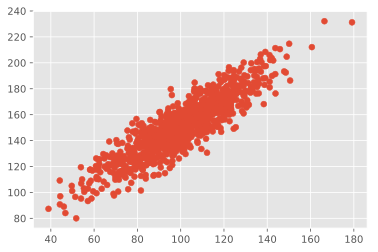

In [64]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

Tests whether two samples have a linear relationship.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples.

In [65]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.888, p=0.000
Probably dependent


### Chi-Squared Test

Tests whether two categorical variables are related or independent.

>A table summarization of two categorical variables in this form is called a contingency table.

For example, the Sex=rows and Interest=columns table with contrived counts might look as follows:


The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable. For example, does an interest in math or science depend on gender, or are they independent?

        Science,    Math,      Art
Male         20,      30,    15
Female       20,      15,    30



Assumptions

- Observations used in the calculation of the contingency table are independent.
- 25 or more examples in each cell of the contingency table.

Interpretation

H0: the two samples are independent.

H1: there is a dependency between the samples.

The degrees of freedom for the chi-squared distribution is calculated based on the size of the contingency table as:

>degrees of freedom: (rows - 1) * (cols - 1)


A contingency table is defined below that has a different number of observations for each population (row), but a similar proportion across each group (column). Given the similar proportions, we would expect the test to find that the groups are similar and that the variables are independent (fail to reject the null hypothesis, or H0

In [58]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [[10, 20, 30],
         [6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


In [59]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)


In [60]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.873
Independent (fail to reject H0)


### 3. Parametric Statistical Hypothesis Tests

**This section lists statistical tests that you can use to compare data samples.**

### Student’s t-test

Tests whether the means of two independent samples are significantly different.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation

H0: the means of the samples are equal.
    
H1: the means of the samples are unequal.

In [42]:
# Student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51

(array([ 3.,  1.,  6., 17., 19., 20., 14., 12.,  5.,  3.]),
 array([38.49230652, 40.73586357, 42.97942062, 45.22297767, 47.46653472,
        49.71009177, 51.95364883, 54.19720588, 56.44076293, 58.68431998,
        60.92787703]),
 <a list of 10 Patch objects>)

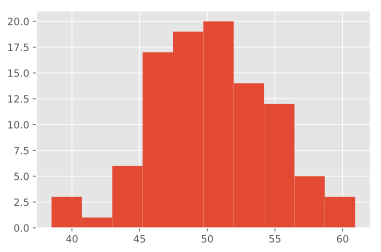

In [43]:
plt.hist(data1)

(array([ 1.,  4., 10.,  7., 23., 21., 19.,  9.,  3.,  3.]),
 array([38.82581118, 41.30739291, 43.78897465, 46.27055639, 48.75213812,
        51.23371986, 53.71530159, 56.19688333, 58.67846506, 61.1600468 ,
        63.64162853]),
 <a list of 10 Patch objects>)

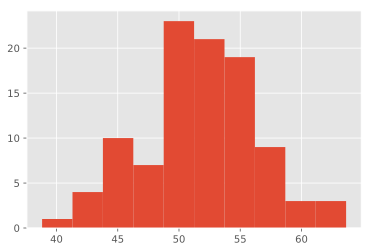

In [44]:
plt.hist(data2)

In [45]:
# Importing the statistics module 
from statistics import mean 
mean(data1)

50.30291426037849

In [46]:
mean(data2)

51.76397388810099

In [47]:
# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.262, p=0.025
Different distributions (reject H0)


The interpretation of the statistic finds that the sample means are different, with a significance of at least 5%.

### Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.
- Observations across each sample are paired.

Interpretation

H0: the means of the samples are equal.

H1: the means of the samples are unequal.

In [50]:
# Paired Student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_rel
# seed the random number generator
seed(1)
# generate two independent samples
data3 = 5 * randn(100) + 50
data4 = 5 * randn(100) + 51

(array([ 3.,  1.,  6., 17., 19., 20., 14., 12.,  5.,  3.]),
 array([38.49230652, 40.73586357, 42.97942062, 45.22297767, 47.46653472,
        49.71009177, 51.95364883, 54.19720588, 56.44076293, 58.68431998,
        60.92787703]),
 <a list of 10 Patch objects>)

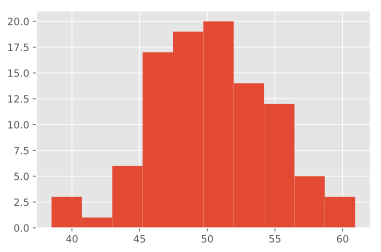

In [51]:
plt.hist(data3)

(array([ 1.,  4., 10.,  7., 23., 21., 19.,  9.,  3.,  3.]),
 array([38.82581118, 41.30739291, 43.78897465, 46.27055639, 48.75213812,
        51.23371986, 53.71530159, 56.19688333, 58.67846506, 61.1600468 ,
        63.64162853]),
 <a list of 10 Patch objects>)

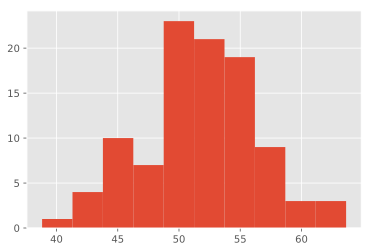

In [52]:
plt.hist(data4)

In [53]:
# compare samples
stat, p = ttest_rel(data3, data4)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.372, p=0.020
Different distributions (reject H0)


### Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation

H0: the means of the samples are equal.
    
H1: one or more of the means of the samples are unequal.

In [39]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


### 4. Nonparametric Statistical Hypothesis Tests

**If the data does not have the familiar Gaussian distribution, we must resort to nonparametric version of the significance tests. These tests operate in a similar manner, but are distribution free, requiring that real valued data be first transformed into rank data before the test can be performed.**

In [54]:
# generate gaussian data samples
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


### Mann-Whitney U Test

Tests whether the distributions of two independent samples are equal or not.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

Interpretation

H0: the distributions of both samples are equal.
    
H1: the distributions of both samples are not equal.

In [55]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=4025.000, p=0.009
Different distribution (reject H0)


The p-value strongly suggests that the sample distributions are different, as is expected.

### Research Question

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

Populations: All parents of black children age 6-18 and all parents of Hispanic children age 6-18

Parameter of Interest: p1 - p2, where p1 = black and p2 = hispanic

Null Hypothesis: p1 - p2 = 0
Alternative Hypthosis: p1 - p2 $\neq$ = 0

Data: 

247 Parents of Black Children. 36.8% of parents report that their child has had some swimming lessons. 
308 Parents of Hispanic Children. 38.9% of parents report that their child has had some swimming lessons.


Difference in population proportion needs t-test. Also, the population follow a binomial distribution here. We can just pass on the two population quantities with the appropriate binomial distribution parameters to the t-test function.

The function returns three values: (a) test statisic, (b) p-value of the t-test

In [6]:
n1 = 247
p1 = .37

n2 = 308
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [ ]:
ttest_ind(population1, population2)

Conclusion of the hypothesis test
Since the p-value is quite high ~0.424, we cannot reject the Null hypothesis in this case i.e. the difference in the population proportions are not statistically significant.

### But what happens if we could survey much higher number of people?

In [ ]:
n1 = 5000
p1 = .37

n2 = 5000
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [ ]:
ttest_ind(population1, population2)

Since the p-value is less we can reject the null hypothesis